<a href="https://colab.research.google.com/github/youssef893/GAN-Autoencoder-with-mnist-dataset/blob/main/GAN-Autoencoder-with-mnist-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Youssef Sayed Ahmed 20180342
# Ahmed Mostafa Abd El-karim 20180031


import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.layers import LeakyReLU

In [ ]:
def build_auto_encoder():
  input_img = keras.Input(shape=(28, 28, 1))

  hidden = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  hidden = layers.MaxPooling2D((2, 2), padding='same')(hidden)

  hidden = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(hidden)
  encoded = layers.MaxPooling2D((2, 2), padding='same')(hidden)

  hidden = layers.UpSampling2D((2, 2))(encoded)
  hidden = layers.UpSampling2D((2, 2))(hidden)

  decoded = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(hidden)

  autoencoder = keras.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='mean_squared_error')
  autoencoder.summary()
  return autoencoder, input_img, encoded


autoencoder, input_img, encoded = build_auto_encoder()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0     

In [ ]:
def read_data():
  (x_train, _), (x_test, _) = mnist.load_data()

  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
  x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
  return x_train, x_test


x_train, x_test = read_data()

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,  # 5, #50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 13ms/step - loss: 0.0263 - val_loss: 0.0172
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0150 - val_loss: 0.0144
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0136 - val_loss: 0.0132
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0133 - val_loss: 0.0130
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0131 - val_lo

In [ ]:
def encoder_model():
  encoder = keras.Model(input_img, encoded)
  encoded_imgs = encoder.predict(x_test)
  encoder.summary()
  print(len(encoder.layers))
  return encoded_imgs


encoded_imgs = encoder_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable p

In [ ]:
def decoder_model():
  decoder = keras.Sequential()
  decoder.add(keras.layers.Input(shape=(7, 7, 8)))
  for i in range(5,len(autoencoder.layers)):
    decoder.add(autoencoder.layers[i])
  print(decoder.summary())
  return decoder


decoder = decoder_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         73        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
def test_model(x_test):
  x_test = x_test.reshape(10000, 28*28)

  decoded_imgs = decoder.predict(encoded_imgs)
  decoded_imgs = decoded_imgs.reshape(10000, 28*28)
  print(decoded_imgs.shape)
  print(mean_squared_error(x_test, decoded_imgs))
  return decoded_imgs


decoded_imgs = test_model(x_test)
print(decoded_imgs)

(10000, 784)
0.012165919
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


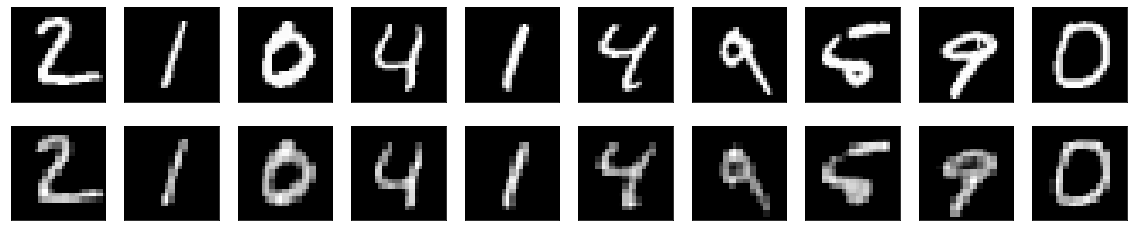

In [ ]:
def plot_decoding_imgs():
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(1, n + 1):
      # Display original
      ax = plt.subplot(2, n, i)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()



plot_decoding_imgs()

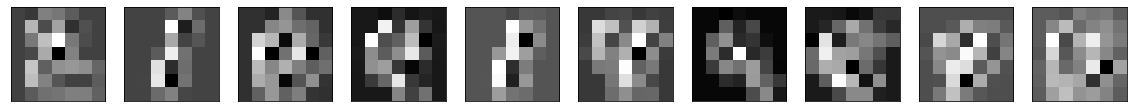

In [ ]:
def plot_encoded_imgs():
  n = 10
  plt.figure(figsize=(20, 8))
  for i in range(1, n + 1):
      ax = plt.subplot(1, n, i)
      plt.imshow(encoded_imgs[i, :, :, 4].reshape((7, 7)))
      # plt.imshow(encoded_imgs[i].reshape((14 * 14 , 16)))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()


plot_encoded_imgs()